In [2]:
import pyLDAvis
import pyLDAvis.gensim_models 
import pickle
import pandas as pd
import os
import re
from wordcloud import WordCloud
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import gensim.corpora as corpora
import warnings
warnings.filterwarnings("ignore")

ImportError: cannot import name 'triu' from 'scipy.linalg.special_matrices' (c:\Users\Dell6\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\linalg\special_matrices.py)

In [5]:
master_path = R"C:\Users\Dell6\Desktop\week0"
papers = pd.read_csv(os.path.join(master_path,"test",'rating.csv'))
print("The shape of the data --->", papers.shape)
papers.head(10)

The shape of the data ---> (58356, 13)


,article_id,source_id,source_name,author,title,description,url,url_to_image,published_at,content,category,article,title_sentiment
0,81664,NaN,Forbes,"Elizabeth Brownfield, Contributor, \n Elizabet...",superstar chef yannick alléno brings refined f...,Now open in Mayfair at Four Seasons Hotel Lond...,https://www.forbes.com/sites/elizabethbrownfie...,https://imageio.forbes.com/specials-images/ima...,2023-11-01 03:27:21.000000,"Pavyllon London, at Four Seasons Hotel London ...",Monaco,"pavyllon london, at four seasons hotel london ...",Neutral
1,81667,NaN,CNA,NaN,nice claim top spot in ligue 1 with late win a...,Nice moved into provisional first place in the...,https://www.channelnewsasia.com/sport/nice-cla...,https://onecms-res.cloudinary.com/image/upload...,2023-10-27 21:28:48.000000,Nice moved into provisional first place in the...,Monaco,nice moved into provisional first place in the...,Positive
2,81694,time,Time,Christina Larson / AP,amphibians are the world’s most vulnerable spe...,"The world’s frogs, salamanders, newts, and oth...",https://time.com/6320467/amphibians-most-vulne...,https://api.time.com/wp-content/uploads/2023/1...,2023-10-04 17:36:18.000000,"The worlds frogs, salamanders, newts and other...",Madagascar,"the world’s frogs, salamanders, newts and othe...",Negative
3,81695,NaN,Phys.Org,Sara Schmidt,image: rusty red waters in madagascar,Iron-rich sediment colors the red-orange water...,https://phys.org/news/2023-10-image-rusty-red-...,https://scx2.b-cdn.net/gfx/news/2023/image-rus...,2023-10-31 18:04:02.000000,Iron-rich sediment colors the red-orange water...,Madagascar,iron-rich sediment colors the red-orange water...,Neutral
4,81703,NaN,Digital Trends,Jason Struss,everything leaving max (formerly hbo max) in n...,From Gangs of London to Fear the Walking Dead ...,https://www.digitaltrends.com/movies/everythin...,https://www.digitaltrends.com/wp-content/uploa...,2023-10-23 23:09:18.000000,"Everything ends. No, I’m not having an existen...",Madagascar,"everything ends. no, i’m not having an existen...",Neutral
5,81707,al-jazeera-english,Al Jazeera English,Al Jazeera,unga calls for humanitarian truce in israel-ha...,The resolution passed with 120 votes in favour...,https://www.aljazeera.com/news/2023/10/27/unga...,https://www.aljazeera.com/wp-content/uploads/2...,2023-10-27 22:16:05.000000,The United Nations General Assembly has passed...,Madagascar,the resolution passed with 120 votes in favour...,Neutral
6,81717,bbc-news,BBC News,https://www.facebook.com/bbcnews,malawi heatwave warning issued as temperatures...,"Temperatures could soar to 44C, the weather bu...",https://www.bbc.co.uk/news/world-africa-67086254,https://ichef.bbci.co.uk/news/1024/branded_new...,2023-10-12 10:40:48.000000,Malawians have been warned of an extreme heatw...,Madagascar,malawians have been warned of an extreme heatw...,Neutral
7,81719,NaN,Phys.Org,Carlyn Chatfield,researcher scans tropical forest with mixed-re...,Rice University scientists used a commercially...,https://phys.org/news/2023-10-scans-tropical-f...,https://scx2.b-cdn.net/gfx/news/2023/rice-rese...,2023-10-19 20:02:03.000000,Rice University scientists used a commercially...,Madagascar,rice university scientists used a commercially...,Neutral
8,81723,NaN,Deadline,Patrick Hipes,"‘taylor swift: the eras tour’ movie: tickets, ...",Taylor Swift has the highest-grossing concert ...,https://deadline.com/feature/taylor-swift-eras...,https://deadline.com/wp-content/uploads/2023/1...,2023-10-11 14:30:00.000000,Taylor Swift has the highest-grossing concert ...,Madagascar,taylor swifthas the highest-grossing concert t...,Neutral
9,81727,NaN,Euronews,NaN,marine le pen found guilty of defamation after...,Marine Le Pen was convicted of defamation agai...,https://www.euronews.com/2023/10/13/marine-le-...,https://static.euronews.com/articles/stories/0...,2023-10-13 15:34:20.000000,Marine Le Pen was convicted of defamation agai...,Madagascar,"marine le pen, former leader of france's far-r...

In [10]:
#sample_text = 200
#papers = papers.drop(columns=['article_id','source_id','title'], axis=1).sample(sample_text)

papers['article_processed'] = \
papers['article'].map(lambda x: re.sub('[,\.|?]', '', x))

papers['article_processed'] = \
papers['article_processed'].map(lambda x: x.lower())

papers['article_processed'].head()

<>:5: SyntaxWarning: invalid escape sequence '\.'
<>:5: SyntaxWarning: invalid escape sequence '\.'
C:\Users\Dell6\AppData\Local\Temp\ipykernel_5044\3463241357.py:5: SyntaxWarning: invalid escape sequence '\.'
  papers['article'].map(lambda x: re.sub('[,\.|?]', '', x))


30958    rayonier advanced materials inc (nyse:ryam–get...
4894     the nigerian naira is among the worst-performi...
32201    jefferies financial group initiated coverage o...
53168    agencies india plans to ask state-run  oil and...
19177    parallel advisors llc grew its stake in accura...
Name: article_processed, dtype: object

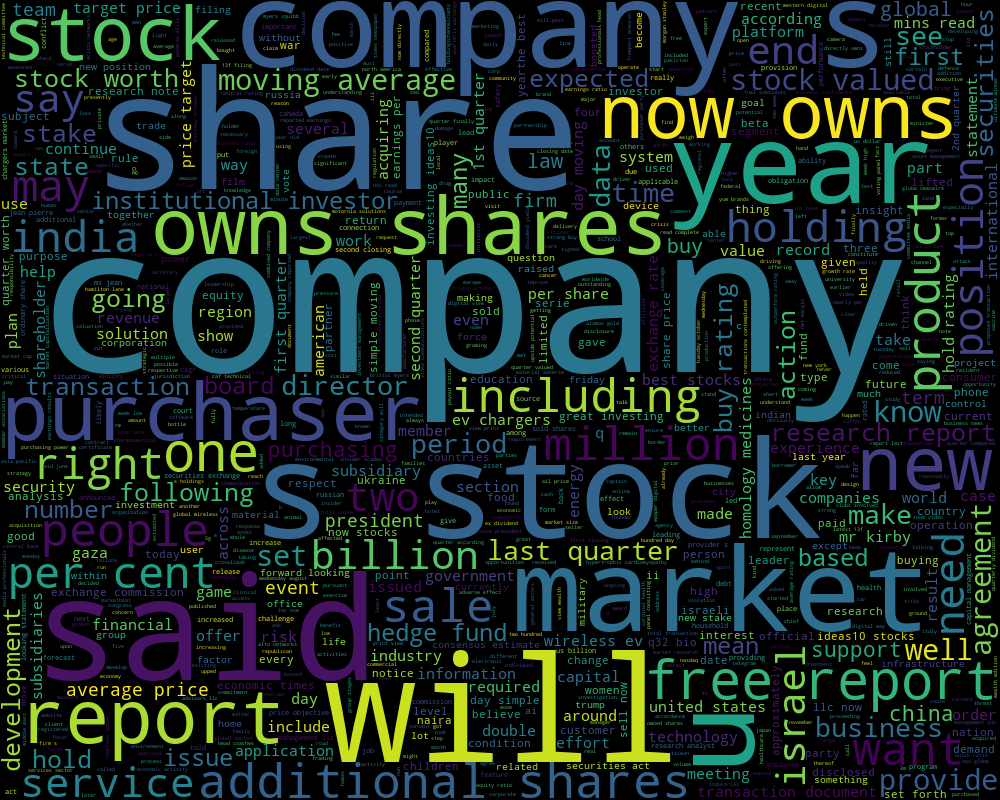

In [11]:
long_string = ','.join(list(papers['article_processed'].values))

WordCloud = WordCloud(background_color="black", max_words=5000, contour_width=3, contour_color='steelblue', width=1000, height=800)

WordCloud.generate(long_string)

WordCloud.to_image()